<a href="https://colab.research.google.com/github/SeonHyungJo/tensorflow-2.0-study/blob/master/Ch04_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17
17


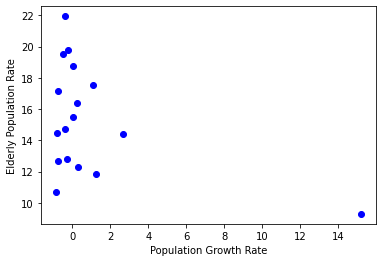

In [ ]:
# 지역별 인구 증가율과 고령인구비율 시각화
import matplotlib.pyplot as plt

population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
pupulation_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

print(len(population_inc))
print(len(pupulation_old))

plt.plot(population_inc, pupulation_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

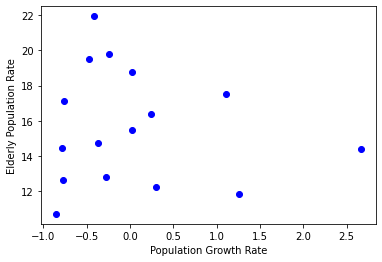

In [ ]:
# 극단치 제거
import matplotlib.pyplot as plt

population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
pupulation_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
pupulation_old = pupulation_old[:5] + pupulation_old[6:]

plt.plot(population_inc, pupulation_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

a:  -0.355834147915461 b:  15.669317743971302


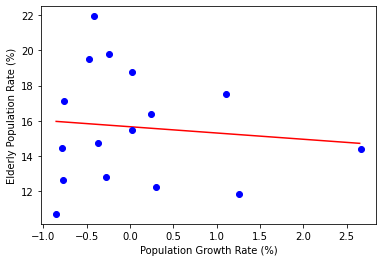

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
X = X[:5] + X[6:]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
Y = Y[:5] + Y[6:]

# X Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a,b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a: ', a, 'b: ', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회궈선을 그립니다.
plt.plot(line_x, line_y, 'r-')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a:  3.8163548 b:  -5.164827 c:  6.183469 loss:  72.417305
199 a:  2.8602295 b:  -4.8079715 c:  10.135657 loss:  32.79447
299 a:  1.3987924 b:  -2.6052587 c:  12.782659 loss:  16.763525
399 a:  0.4085194 b:  -1.0516987 c:  14.455844 loss:  11.25021
499 a:  -0.13798092 b:  -0.19356413 c:  15.378323 loss:  9.801094
599 a:  -0.39921552 b:  0.21658498 c:  15.819455 loss:  9.507972
699 a:  -0.50803274 b:  0.38742968 c:  16.00322 loss:  9.462182
799 a:  -0.5475982 b:  0.44954684 c:  16.070038 loss:  9.456661
899 a:  -0.56014484 b:  0.469246 c:  16.091225 loss:  9.456149
999 a:  -0.56360465 b:  0.47467825 c:  16.097067 loss:  9.456113


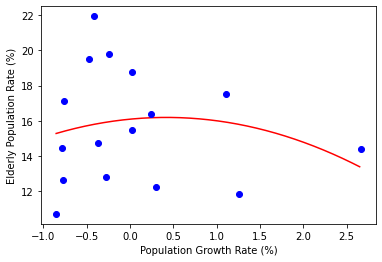

In [ ]:
# 텐서플로를 이용해 2차함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
X = X[:5] + X[6:]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
Y = Y[:5] + Y[6:]

# a b c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수합니다.
def compute_loss():
  y_pred = a * X * X + b * X + c
  loss = tf.reduce_mean((Y-y_pred) ** 2)
  return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000):
  # 잔차의 제곱의 평균을 최소화합니다.
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  if i % 100 == 99 :
    print(i, 'a: ', a.numpy(), 'b: ', b.numpy(), 'c: ', c.numpy(), 'loss: ', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c


plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a:  -1.4404571 b:  6.5401683 c:  -3.6625159 d:  6.166443 loss:  64.234276
199 a:  -2.1345124 b:  7.291385 c:  -2.37322 d:  9.717239 loss:  32.23188
299 a:  -1.7577393 b:  5.4042163 c:  -1.0027775 d:  11.922038 loss:  20.901611
399 a:  -0.9908149 b:  2.9763622 c:  -0.578886 d:  13.496202 loss:  14.595831
499 a:  -0.25812274 b:  0.82644796 c:  -0.46923044 d:  14.680419 loss:  11.059204
599 a:  0.31492212 b:  -0.8294439 c:  -0.42753726 d:  15.556849 loss:  9.28032
699 a:  0.7228786 b:  -2.0049086 c:  -0.40356407 d:  16.173805 loss:  8.483803
799 a:  0.9941433 b:  -2.7860794 c:  -0.3883334 d:  16.58305 loss:  8.165852
899 a:  1.1635789 b:  -3.2739415 c:  -0.37892926 d:  16.8385 loss:  8.052681
999 a:  1.2631049 b:  -3.5604975 c:  -0.37342405 d:  16.988522 loss:  8.016794


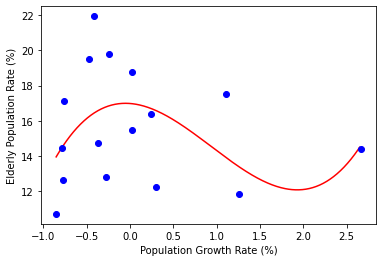

In [ ]:
# 텐서플로를 이용해 3차함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
X = X[:5] + X[6:]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
Y = Y[:5] + Y[6:]

# a b c d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수합니다.
def compute_loss():
  y_pred = a * X*X*X + b * X*X + c * X + d
  loss = tf.reduce_mean((Y-y_pred) ** 2)
  return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000):
  # 잔차의 제곱의 평균을 최소화합니다.
  optimizer.minimize(compute_loss, var_list=[a,b,c,d])

  if i % 100 == 99 :
    print(i, 'a: ', a.numpy(), 'b: ', b.numpy(), 'c: ', c.numpy(), 'd: ', d.numpy(), 'loss: ', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d


plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [ ]:
# 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np
X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
X = X[:5] + X[6:]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
Y = Y[:5] + Y[6:]

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 8.8928
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 8.8554
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 8.8189
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 8.7830
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 8.7476
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 8.7124
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 8.6772
Epoch 8/10
1/1 [==============================] - 0s 969us/step - loss: 8.6418
Epoch 9/10
1/1 [==============================] - 0s 939us/step - loss: 8.6060
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 8.5697


In [ ]:
model.predict(X)

array([[16.202518 ],
       [15.104799 ],
       [14.575155 ],
       [16.509638 ],
       [14.714098 ],
       [16.299393 ],
       [16.419691 ],
       [16.008305 ],
       [15.1368065],
       [16.222736 ],
       [14.880983 ],
       [16.143118 ],
       [16.382929 ],
       [16.513903 ],
       [15.168774 ],
       [14.242949 ]], dtype=float32)

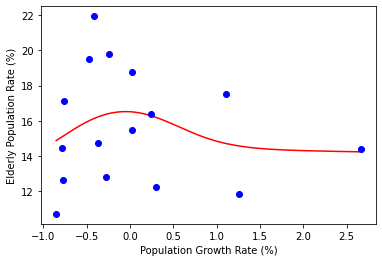

In [ ]:
# 딥러닝 네트워크의 회권 그래프
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()